In [1]:
# Googleドライブマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# データの読み込みと確認

In [2]:
# ライブラリのインポート
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler

# データの読み込み
df = pd.read_csv('/content/drive/MyDrive/pm/data/processed/add_feature_df.csv')
submission = pd.read_csv('/content/drive/MyDrive/pm/data/input/submit_sample.csv', header=None)

# 特徴量エンジニアリング（特徴量修正）

## 対数変換

In [3]:
log1p_cols = ['co_cnt',
              'co_min',
              'co_mid',
              'co_max',
              'co_var',
              'o3_cnt', 
              'o3_min',
              'o3_mid',
              'o3_max',
              'o3_var',
              'so2_cnt',
              'so2_min', 
              'so2_mid',
              'so2_max',
              'so2_var',
              'no2_cnt',
              'no2_min',
              'no2_mid',
              'no2_max',
              'no2_var',
]

df[log1p_cols] = np.log1p(df[log1p_cols])

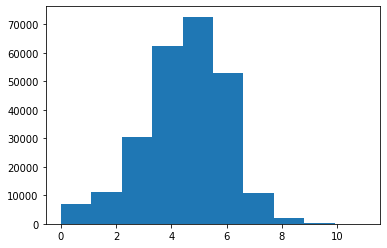

In [4]:
plt.hist(df['no2_var'])
plt.show()

# CSVファイル出力

In [5]:
df

,id,year,month,day,Country,City,lat,lon,co_cnt,co_min,...,population,area,density,hemisphere,season,city_month_mean,city_year_month_mean,country_month_mean,country_year_month_mean,country_month_median
0,1,2019,1,1,Australia,Brisbane,-27.46794,153.02809,3.663562,0.559044,...,2350000,4673.2000,502.867414,1,summer,33.808158,23.133500,44.427941,40.310798,28.690
1,2,2019,1,1,Australia,Darwin,-12.46113,130.84185,3.871201,1.279266,...,140068,3163.8000,44.272078,1,summer,28.573727,22.349633,44.427941,40.310798,28.690
2,3,2019,1,1,Australia,Melbourne,-37.81400,144.96332,2.890372,0.783902,...,4641000,8806.0000,527.027027,1,summer,43.757293,40.569548,44.427941,40.310798,28.690
3,4,2019,1,1,Australia,Newcastle,-32.92953,151.78010,4.158883,1.720263,...,154777,261.8000,591.203209,1,summer,71.098849,55.471935,44.427941,40.310798,28.690
4,5,2019,1,1,Australia,Perth,-31.95224,115.86140,3.871201,1.738534,...,1980000,6418.0000,308.507323,1,summer,45.720391,38.078800,44.427941,40.310798,28.690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249445,249446,2021,12,31,Turkey,Antakya,36.98615,35.32531,4.584967,1.735894,...,1730000,1945.0000,889.460154,0,winter,112.648742,163.016484,84.940667,83.449246,68.519
249446,249447,2021,12,31,Turkey,İzmit,40.19559,29.06013,4.820282,2.924290,...,3101833,10422.0000,297.623585,0,winter,72.303220,60.006387,84.940667,83.449246,68.519
249447,249448,2021,12,31,Turkey,Samsun,41.00500,39.72694,5.017280,0.120446,...,312060,188.8500,1652.422558,0,winter,72.379655,70.846774,84.940667,83.449246,68.519
249448,249449,2021,12,31,United Kingdom,Southend-on-Sea,51.50853,-0.12574,3.091042,0.055435,...,8674000,1572.0000,5517.811705,0,winter,41.818333,46.862000,38.891258,38.630936,30.916


In [6]:
print(df.columns, len(df.columns))

Index(['id', 'year', 'month', 'day', 'Country', 'City', 'lat', 'lon', 'co_cnt',
       'co_min', 'co_mid', 'co_max', 'co_var', 'o3_cnt', 'o3_min', 'o3_mid',
       'o3_max', 'o3_var', 'so2_cnt', 'so2_min', 'so2_mid', 'so2_max',
       'so2_var', 'no2_cnt', 'no2_min', 'no2_mid', 'no2_max', 'no2_var',
       'temperature_cnt', 'temperature_min', 'temperature_mid',
       'temperature_max', 'temperature_var', 'humidity_cnt', 'humidity_min',
       'humidity_mid', 'humidity_max', 'humidity_var', 'pressure_cnt',
       'pressure_min', 'pressure_mid', 'pressure_max', 'pressure_var',
       'ws_cnt', 'ws_min', 'ws_mid', 'ws_max', 'ws_var', 'dew_cnt', 'dew_min',
       'dew_mid', 'dew_max', 'dew_var', 'pm25_mid', 'population', 'area',
       'density', 'hemisphere', 'season', 'city_month_mean',
       'city_year_month_mean', 'country_month_mean', 'country_year_month_mean',
       'country_month_median'],
      dtype='object') 64


In [7]:
# データフレームの保存
df.to_csv('/content/drive/MyDrive/pm/data/processed/processed_df.csv', header=True, index=False)